<a href="https://colab.research.google.com/github/prashant9907/Sentiment-Analysis/blob/main/Sentiment_on_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataframe = pd.read_csv("/content/drive/MyDrive/archive (1)/1429_1.csv",usecols=['id','reviews.rating', 'reviews.text'], encoding = 'utf8')
dataframe.head()

,id,reviews.rating,reviews.text
0,AVqkIhwDv8e3D1O-lebb,5.0,This product so far has not disappointed. My c...
1,AVqkIhwDv8e3D1O-lebb,5.0,great for beginner or experienced person. Boug...
2,AVqkIhwDv8e3D1O-lebb,5.0,Inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,4.0,I've had my Fire HD 8 two weeks now and I love...
4,AVqkIhwDv8e3D1O-lebb,5.0,I bought this for my grand daughter when she c...


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34660 non-null  object 
 1   reviews.rating  34627 non-null  float64
 2   reviews.text    34659 non-null  object 
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


In [ ]:
dataframe.isnull().sum()

id                 0
reviews.rating    33
reviews.text       1
dtype: int64

In [ ]:
dataframe = dataframe.fillna(method = "ffill",axis = 0)

In [ ]:
dataframe.isnull().sum()

id                0
reviews.rating    0
reviews.text      0
dtype: int64

In [ ]:
import re
import string
def cleanstr(text):
    text= str(text).lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(stopwords.words('english'))
stopwords.remove('not')
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer  = WordNetLemmatizer()
def lemmatize(text):
  token = word_tokenize(text)
  word_pos_tags = nltk.pos_tag(token)
  token_with_lemmatizer = []
  for idx, tag in enumerate(word_pos_tags):
    token_with_lemmatizer.append(lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])))
  
  text = " ".join(token_with_lemmatizer)
  return text


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
sentiment = {
            1: -1,
            2: -1,
            3: 0,
            4: 1,
            5: 1}

In [ ]:
dataframe['sentiment'] = dataframe['reviews.rating'].map(sentiment)

In [ ]:
dataframe['reviews.text'] = dataframe['reviews.text'].apply(cleanstr)
dataframe['reviews.text'] = dataframe['reviews.text'].apply(remove_stopwords)
dataframe['reviews.text'] = dataframe['reviews.text'].apply(lemmatize)
dataframe.head()

,id,reviews.rating,reviews.text,sentiment
0,AVqkIhwDv8e3D1O-lebb,5.0,product far not disappointed child love use li...,1
1,AVqkIhwDv8e3D1O-lebb,5.0,great beginner experience person buy gift love,1
2,AVqkIhwDv8e3D1O-lebb,5.0,inexpensive tablet use learn step nabi thrill ...,1
3,AVqkIhwDv8e3D1O-lebb,4.0,fire hd two week love tablet great value prime...,1
4,AVqkIhwDv8e3D1O-lebb,5.0,buy grand daughter come visit set user enter a...,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34660 non-null  object 
 1   reviews.rating  34660 non-null  float64
 2   reviews.text    34660 non-null  object 
 3   sentiment       34660 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


# Model Implementation 

In [ ]:
import numpy as np
index = dataframe.index
dataframe['random_number'] = np.random.randn(len(index))
train = dataframe[dataframe['random_number'] <= 0.8]
test = dataframe[dataframe['random_number'] > 0.8]

In [ ]:
train.head()
Y_train = train['sentiment']
Y_test = test['sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [ ]:
cv = CountVectorizer()
X_train  = cv.fit_transform(train['reviews.text'])
X_test = cv.transform(test['reviews.text'])

In [ ]:
X_train =  X_train.toarray()
X_test = X_test.toarray()

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 8, activation = 'relu' ))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 30)

Epoch 1/30
851/851 [==============================] - 9s 10ms/step - loss: 0.1289 - accuracy: 0.9331
Epoch 2/30
851/851 [==============================] - 8s 9ms/step - loss: 0.1025 - accuracy: 0.9280
Epoch 3/30
851/851 [==============================] - 8s 9ms/step - loss: 0.0945 - accuracy: 0.9297
Epoch 4/30
851/851 [==============================] - 8s 9ms/step - loss: 0.0896 - accuracy: 0.9313
Epoch 5/30
851/851 [==============================] - 8s 9ms/step - loss: 0.0861 - accuracy: 0.9325
Epoch 6/30
851/851 [==============================] - 8s 9ms/step - loss: 0.0833 - accuracy: 0.9345
Epoch 7/30
851/851 [==============================] - 9s 11ms/step - loss: 0.0803 - accuracy: 0.9355
Epoch 8/30
851/851 [==============================] - 8s 9ms/step - loss: 0.0776 - accuracy: 0.9381
Epoch 9/30
851/851 [==============================] - 8s 9ms/step - loss: 0.0753 - accuracy: 0.9393
Epoch 10/30
851/851 [==============================] - 8s 9ms/step - loss: 0.0738 - accuracy: 0.94

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                161568    
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161,713
Trainable params: 161,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc  = model.evaluate(X_test,Y_test)

233/233 [==============================] - 1s 5ms/step - loss: 0.1085 - accuracy: 0.9125


In [ ]:
print(test_loss)
print(test_acc)

0.10854531079530716
0.9124597311019897


# Model Deployment


In [ ]:
text='''This product is great, happy!'''

text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

product great happy


In [ ]:
vec=cv.transform([text])
vec = vec.toarray()
print(vec)

pre= model.predict(vec)
print(pre)
if pre<=0.35:
    print("Negative")
elif pre<=0.65:
    print("Neutral")
else:
    print("Positive")

[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 65ms/step
[[0.9640616]]
Positive


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/archive (1)/model_save.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/archive (1)/model_save.hdf5')

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/archive (1)/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', usecols = ['reviews.rating','reviews.text'], encoding = 'utf8')
dataset.head()

,reviews.rating,reviews.text
0,3,I order 3 of them and one of the item is bad q...
1,4,Bulk is always the less expensive way to go fo...
2,5,Well they are not Duracell but for the price i...
3,5,Seem to work as well as name brand batteries a...
4,5,These batteries are very long lasting the pric...


In [ ]:
dataset['reviews.text'] = dataset['reviews.text'].apply(cleanstr)
dataset['reviews.text'] = dataset['reviews.text'].apply(remove_stopwords)
dataset['reviews.text'] = dataset['reviews.text'].apply(lemmatize)
dataset.head()

,reviews.rating,reviews.text
0,3,order one item bad quality miss backup spring ...
1,4,bulk always less expensive way go product like
2,5,well not duracell price happy
3,5,seem work well name brand battery much good price
4,5,battery long lasting price great


In [ ]:

dataset['sentiment'] = dataset['reviews.rating'].map(sentiment)
dataset.head()

,reviews.rating,reviews.text,sentiment
0,3,order one item bad quality miss backup spring ...,0
1,4,bulk always less expensive way go product like,1
2,5,well not duracell price happy,1
3,5,seem work well name brand battery much good price,1
4,5,battery long lasting price great,1


In [ ]:
dataset = dataset.fillna(method = "ffill",axis = 0)

In [ ]:


test = cv.transform(dataset['reviews.text'])

In [ ]:
test = test.toarray()

In [ ]:
dataset['result'] = loaded_model.predict(test)

886/886 [==============================] - 4s 5ms/step


In [ ]:
dataset.head()

,reviews.rating,reviews.text,sentiment,result
0,3,order one item bad quality miss backup spring ...,0,0.866611
1,4,bulk always less expensive way go product like,1,0.968542
2,5,well not duracell price happy,1,0.908334
3,5,seem work well name brand battery much good price,1,0.929807
4,5,battery long lasting price great,1,0.959951


In [ ]:
def findout(data):
  if data < 0.45:
    return -1
  elif data > 0.85:
    return 1
  else:
    return 0

In [ ]:
dataset['reviews.sentiment'] = dataset['result'].apply(findout)

In [ ]:
dataset.head(10)

,reviews.rating,reviews.text,sentiment,result,reviews.sentiment
0,3,order one item bad quality miss backup spring ...,0,0.866611,1
1,4,bulk always less expensive way go product like,1,0.968542,1
2,5,well not duracell price happy,1,0.908334,1
3,5,seem work well name brand battery much good price,1,0.929807,1
4,5,battery long lasting price great,1,0.959951,1
5,5,buy lot battery christmas amazonbasics cell go...,1,0.984074,1
6,5,ive not problame battery order past pleased,1,0.933060,1
7,5,well look cheap non rechargeable battery last ...,1,0.973152,1
8,3,not hold amount high power juice like energize...,0,0.016925,-1
9,4,amazonbasics aa aaa battery do well appear goo...,1,0.959982,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


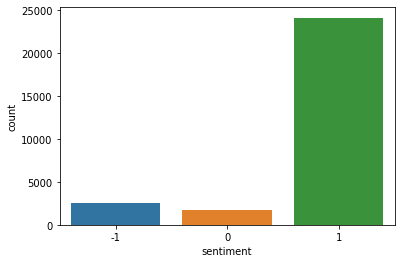

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(dataset['reviews.sentiment'])
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews.rating     28332 non-null  int64  
 1   reviews.text       28332 non-null  object 
 2   sentiment          28332 non-null  int64  
 3   result             28332 non-null  float32
 4   reviews.sentiment  28332 non-null  int64  
dtypes: float32(1), int64(3), object(1)
memory usage: 996.2+ KB


In [ ]:
dataset['reviews.sentiment'].value_counts()

 1    24145
-1     2500
 0     1687
Name: reviews.sentiment, dtype: int64

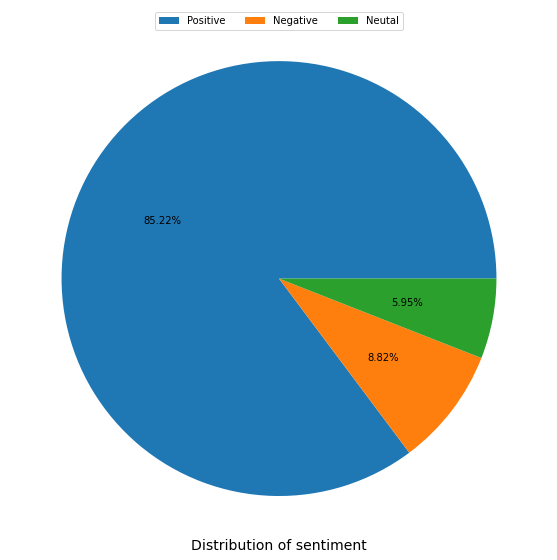

In [ ]:
plt.figure(figsize = (10, 10))
label=["Positive","Negative","Neutal"]
plt.pie(dataset['reviews.sentiment'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.show()

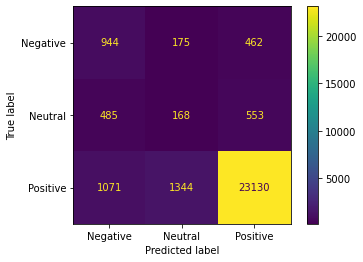

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(dataset['sentiment'], dataset['reviews.sentiment'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative','Neutral', 'Positive'])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(dataset['sentiment'], dataset['reviews.sentiment'])
print("Accuracy of Model: ", Accuracy)

Accuracy of Model:  0.8556402654242553


In [ ]:
Precision = metrics.precision_score(dataset['sentiment'], dataset['reviews.sentiment'],average='micro')
print("Precision of Model: ", Precision)

Precision of Model:  0.8556402654242553


In [ ]:
Sensitivity_recall = metrics.recall_score(dataset['sentiment'], dataset['reviews.sentiment'],average='micro')
print("Sensitivity_recall of Model: ",Sensitivity_recall)

Sensitivity_recall of Model:  0.8556402654242553


In [ ]:
Specificity = metrics.recall_score(dataset['sentiment'], dataset['reviews.sentiment'],average='micro', pos_label=0)
print("Specificity of Model: ", Specificity)

Specificity of Model:  0.8556402654242553


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
F1_score = metrics.f1_score(dataset['sentiment'], dataset['reviews.sentiment'],average='micro')
print("F1_score of Model: ", F1_score)

F1_score of Model:  0.8556402654242553


In [ ]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.8556402654242553, 'Precision': 0.8556402654242553, 'Sensitivity_recall': 0.8556402654242553, 'Specificity': 0.8556402654242553, 'F1_score': 0.8556402654242553}
